In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import random as rd

In [252]:
def get_distance(x, xk):

    return np.sqrt((x.reshape(-1,1)-xk.reshape(1,-1))**2)

In [253]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)


In [254]:
# randomly select initial clusters from input data
def random_centres(X, k):
  
    centroids = X[np.random.choice(range(len(X)), k)]    

    return np.array(centroids)

In [255]:
class RBF(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf      
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
    
        self.centers = random_centres(X, self.k)
        dMax = np.max([get_distance(c1, c2) for c1 in self.centers for c2 in self.centers])
        self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))
                # backward pass
                error = -(y[i] - F).flatten()
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
            
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [256]:
def true_fn(x):
    return x**2-x-np.cos(np.pi*x)

In [257]:
## Training set: sampling 100 points in the range of [-1,1]
X = np.linspace(-1,1,100)
y= true_fn(X)

Loss: 10.71
Loss: 9.94
Loss: 9.19
Loss: 8.45
Loss: 7.73
Loss: 7.03
Loss: 6.35
Loss: 5.71
Loss: 5.09
Loss: 4.51
Loss: 3.96
Loss: 3.44
Loss: 2.96
Loss: 2.52
Loss: 2.12
Loss: 1.75
Loss: 1.42
Loss: 1.13
Loss: 0.87
Loss: 0.65
Loss: 0.46
Loss: 0.31
Loss: 0.19
Loss: 0.10
Loss: 0.04
Loss: 0.01
Loss: 0.00
Loss: 0.02
Loss: 0.06
Loss: 0.11
Loss: 0.19
Loss: 0.28
Loss: 0.39
Loss: 0.50
Loss: 0.62
Loss: 0.75
Loss: 0.88
Loss: 1.01
Loss: 1.13
Loss: 1.26
Loss: 1.37
Loss: 1.48
Loss: 1.58
Loss: 1.67
Loss: 1.74
Loss: 1.80
Loss: 1.85
Loss: 1.88
Loss: 1.90
Loss: 1.90
Loss: 1.89
Loss: 1.86
Loss: 1.82
Loss: 1.77
Loss: 1.71
Loss: 1.64
Loss: 1.56
Loss: 1.48
Loss: 1.39
Loss: 1.29
Loss: 1.19
Loss: 1.10
Loss: 1.00
Loss: 0.90
Loss: 0.80
Loss: 0.71
Loss: 0.61
Loss: 0.53
Loss: 0.45
Loss: 0.37
Loss: 0.30
Loss: 0.24
Loss: 0.19
Loss: 0.14
Loss: 0.10
Loss: 0.06
Loss: 0.04
Loss: 0.02
Loss: 0.01
Loss: 0.00
Loss: 0.00
Loss: 0.01
Loss: 0.02
Loss: 0.04
Loss: 0.06
Loss: 0.09
Loss: 0.12
Loss: 0.15
Loss: 0.19
Loss: 0.22
Loss: 0.2

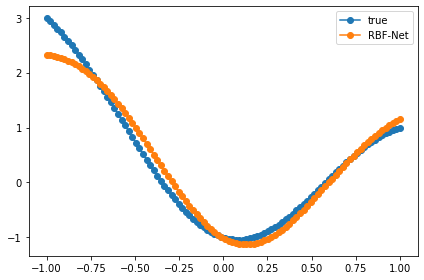

In [258]:
rbfnet = RBF(lr=1e-2, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [259]:
import numpy as np
from scipy import interpolate

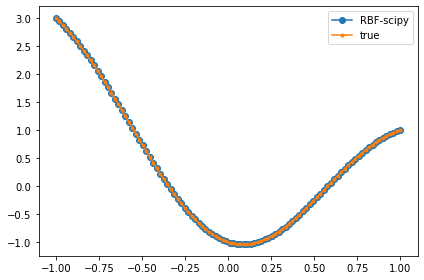

In [260]:
kind = 'gaussian'

newfunc = interpolate.Rbf(X,y, function=kind)
y_pred = newfunc(X)

plt.plot(X, y_pred, '-o', label='RBF-scipy')
plt.plot(X, y, '-o', markersize=3, label='true')

plt.legend()
plt.tight_layout()
plt.show()